# Finding loyal users to create a loyality program

**Importing the data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('lesson_3_data_1_.csv', encoding = 'windows-1251')

df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


**Creating a dataframe with useful columns: 'tc' - user id, 'art_sp' - brand name**

In [2]:
user_df = df[['tc', 'art_sp']]
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


**Renaming the columns of the new dataframe**

In [3]:
user_df = user_df.rename(columns = {'tc' : 'user_id', 'art_sp' : 'brand_info'})

In [4]:
user_df.tail()

,user_id,brand_info
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand
48128,48582221,SPAGHETTINI 500 G Store_Brand


**Spliting the product name to get only the brand name**

In [5]:
brand_name = 'MARAVILLA 500 G Store_Brand'

# Solution 1

brand_name.split(' ')[-1]

'Store_Brand'

In [6]:
# Solution 2

def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

split_brand(brand_name)

user_df['brand_name'] = user_df.brand_info.apply(split_brand)
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [7]:
# Solution 3: lambda functions
# This is the more compact way to get the brand name. Here we use the lambda function to cut the string with a space and get the last element

user_df.brand_info.apply(lambda x:x.split(' ')[-1]) \
    .head()

0    Store_Brand
1    Store_Brand
2        Brand_1
3        Brand_7
4        Brand_2
Name: brand_info, dtype: object

**Finding the amount of purchases per user**

In [8]:
user_purchase = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name' : 'count'}).sort_values('brand_name', ascending = False) \
    .rename(columns ={'brand_name' : 'purchase'})

user_purchase.head()

,user_id,purchase
6326,62325711,60
3376,19317282,55
670,1228091,52
1377,3133061,51
3965,23440561,47


**Checkig how many users are in the dataframe**

In [9]:
user_purchase.shape

(11764, 2)

**Checking the desriptive metrics of the dataframe to start making first assumptions**

In [10]:
user_purchase.describe()

,user_id,purchase
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [11]:
# 75% of users were taken as the first attempt to analyse the data. This amount could be changed afterwards depending of the future outcomes and business requirements

user_purchase = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name' : 'count'}).sort_values('brand_name', ascending = False) \
    .rename(columns ={'brand_name' : 'purchase'}) \
    .query("purchase >= 5")
            
user_purchase.describe()

,user_id,purchase
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


**Finding the favorite brands of the users**

In [12]:
# Let's check what is the persentage of the "most favorite brand" in the user purchases

# First let's find the max amount of purchases of one brand made by a user

lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'], as_index = False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending = [False, False]) \
    .groupby('user_id').head(1) \
    .sort_values('brand_info', ascending = False) \
    .rename(columns = {'brand_name': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
5661,19317282,Brand_4,55
10202,62325711,Brand_4,54
6618,23440561,Brand_1,40
1591,1926721,Brand_4,40
13680,91303961,Brand_4,39


In [13]:
# Now let's calculate the amount of unique brands per user

users_unique_brands = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name' : pd.Series.nunique}) \
    .rename(columns = {'brand_name' : 'unique_brand'})
            
users_unique_brands.head()

,user_id,unique_brand
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


**Joining the dataframes into one**

In [14]:
loyality_df = user_purchase \
    .merge(users_unique_brands, on = 'user_id') \
    .merge(lovely_brand_purchases_df, on = 'user_id')

loyality_df.head()

,user_id,purchase,unique_brand,lovely_brand,lovely_brand_purchases
0,62325711,60,3,Brand_4,54
1,19317282,55,1,Brand_4,55
2,1228091,52,5,Brand_4,26
3,3133061,51,4,Brand_4,30
4,23440561,47,4,Brand_1,40


**Finding the users that buy 1 brand only**

In [15]:
loyal_users = loyality_df[loyality_df.unique_brand == 1]

# These users could already go to our results because they always buy the same brand

In [16]:
loyality_df.head()

,user_id,purchase,unique_brand,lovely_brand,lovely_brand_purchases
0,62325711,60,3,Brand_4,54
1,19317282,55,1,Brand_4,55
2,1228091,52,5,Brand_4,26
3,3133061,51,4,Brand_4,30
4,23440561,47,4,Brand_1,40


**Create a new metric 'Loyality score'.**

**Loyality score** - What percentage of all purchases came from the favorite brand

In [17]:
loyality_df['loyality_score'] = loyality_df.lovely_brand_purchases/loyality_df.purchase

In [18]:
loyality_df.loyality_score.describe()

count    3383.000000
mean        0.759356
std         0.198331
min         0.200000
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name: loyality_score, dtype: float64

**Disctribution of loyality score of the users**

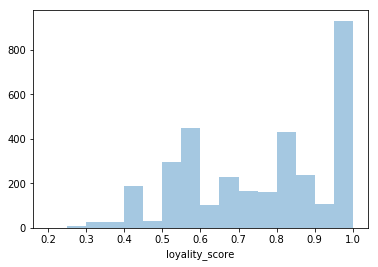

In [23]:
ax = sns.distplot(loyality_df.loyality_score, kde = False)

Now we need to talk to our business team and discuss with them what level of loyality they would like to have for their purposes. 

**Finding the brand loyality**

In [20]:
brand_loyality = loyality_df.groupby('lovely_brand', as_index = False) \
    .agg({'loyality_score' : 'median', 'user_id' : 'count' }) 

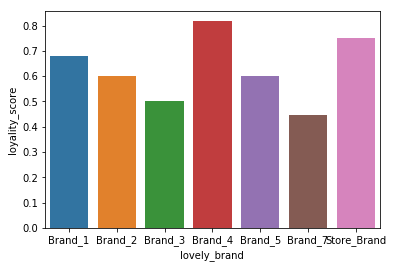

In [21]:
# Findind the brand with the highest loyality score

ax = sns.barplot(x="lovely_brand", y="loyality_score", data=brand_loyality)

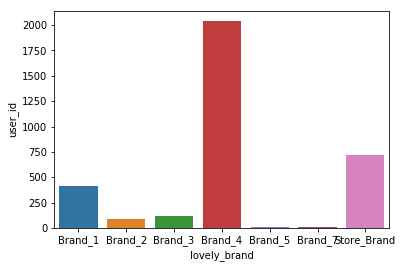

In [22]:
# Calculating the amount of users that were loyal to the brand

ax = sns.barplot(x="lovely_brand", y="user_id", data=brand_loyality)

**We discovered that even thought the other brands have a high loyality score, the most amount of users prefer the brand 4.**